In [1]:
# import libraries
import pandas as pd
import requests as rq
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# initialize dataframe
df = pd.read_csv('./assets/Smart_City_index_headers.csv')
# display first 5 rows
df.head()

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340


In [3]:
# Describe dataframe
df.describe()

,Id,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,51.500000,5759.401961,5943.500000,5893.803922,6131.803922,5874.049020,6377.039216,5991.911765,-480.392157
std,29.588849,1214.030137,1724.032171,1153.375297,1801.555148,1449.096341,2286.397477,852.775180,852.783238
min,1.000000,3175.000000,1850.000000,2806.000000,1490.000000,2825.000000,1980.000000,4191.000000,-2281.000000
25%,26.250000,4809.750000,4530.500000,5143.000000,5007.500000,4724.750000,4385.000000,5366.250000,-1105.750000
50%,51.500000,5651.500000,6495.000000,5911.000000,6432.500000,5747.500000,6485.000000,6261.500000,-210.500000
75%,76.750000,6763.750000,7310.000000,6581.500000,7492.500000,7061.250000,8710.000000,6672.500000,200.500000
max,102.000000,8110.000000,8844.000000,8726.000000,9225.000000,9695.000000,10000.000000,7353.000000,880.000000


In [4]:
# check for null values
df.isnull().sum()

Id                                   0
City                                 0
Country                              0
Smart_Mobility                       0
Smart_Environment                    0
Smart_Government                     0
Smart_Economy                        0
Smart_People                         0
Smart_Living                         0
SmartCity_Index                      0
SmartCity_Index_relative_Edmonton    0
dtype: int64

In [5]:
# explore dataframe columns
# some have spaces, so this needs to be cleaned
df.columns

Index(['Id', 'City', 'Country', 'Smart_Mobility ', 'Smart_Environment',
       'Smart_Government ', 'Smart_Economy ', 'Smart_People', 'Smart_Living',
       'SmartCity_Index', 'SmartCity_Index_relative_Edmonton'],
      dtype='object')

In [6]:
# strip columns of whitespaces at the end
df.columns = df.columns.str.strip()

In [7]:
# verify results of previous operation
df.columns

Index(['Id', 'City', 'Country', 'Smart_Mobility', 'Smart_Environment',
       'Smart_Government', 'Smart_Economy', 'Smart_People', 'Smart_Living',
       'SmartCity_Index', 'SmartCity_Index_relative_Edmonton'],
      dtype='object')

In [8]:
disputed_countries = {
    'South Korea': 'Republic of Korea'
}

# create function to get a particular field value from the restcountries API
def get_field_value(country_name, field_name):
    country=None
    field_value=None

    # check if entry exists in disputed_countries dict
    try:
        country=disputed_countries[country_name]
    # if none, KeyError will be triggered, so use regular country_name
    except KeyError:
        country=country_name
    finally:
        # based on personal experience, using the fullText parameter yields more accurate results
        response = rq.get('https://restcountries.eu/rest/v2/name/'+ country +'?fullText=true')

        # API call was successful
        if response.status_code == 200:
            field_value = response.json()[0][field_name]
        # API call was unsuccessful: attempt another API call without the fullText parameter
        else:
            response2 = rq.get('https://restcountries.eu/rest/v2/name/'+ country)
            if response2.status_code == 200:
                field_value = response2.json()[0][field_name]

    return field_value

In [9]:
# this is where the continents list will be stored
regions=[]

# loop thru the list of Countries
for country in df['Country']:
    # call method declared on previous step to get the region where the country belongs to
    region=get_field_value(country, 'region')
    # append to regions list
    regions.append(region)

In [10]:
# show unique values in regions list and verify it with the length of the Country column
print('Region length: ', len(regions))
print('Country column length: ', len(df['Country']))

Region length:  102
Country column length:  102


In [11]:
# Add Region column after Country column
# Values will be the regions list obtained before
df.insert(3, 'Region', regions)

In [12]:
# verify if Region column was added
df.head(10)

,Id,City,Country,Region,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,Europe,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,Europe,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,Europe,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,Europe,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,Europe,6122,7692,8354,4330,6743,7730,6812,340
5,6,Montreal,Canada,Americas,7490,4848,6624,6180,8465,9920,7353,880
6,7,Vienna,Austria,Europe,5683,7608,6232,5415,8580,7500,6771,298
7,8,Odense,Denmark,Europe,6160,8404,7578,5200,6955,7200,6886,414
8,9,Singapore,Singapore,Asia,5790,4344,5560,5535,9695,10000,6813,341
9,10,Boston,United States,Americas,7870,5224,6020,8935,6573,6220,6852,380


In [13]:
# check for any null values present in Region column
df['Region'].isnull().sum()

0

In [14]:
# Q2: Correlation between smart people and aggregate to see if education makes a difference?
df[['SmartCity_Index', 'Smart_People']].corr()

,SmartCity_Index,Smart_People
SmartCity_Index,1.000000,0.504805
Smart_People,0.504805,1.000000


In [15]:
# Q3: Which continent has the most smart cities?

# Using Pure Python
for region in df['Region'].unique():
    print('Smart cities in {0}: {1}'.format(region, len(df[df['Region'] == region])))

Smart cities in Europe: 71
Smart cities in Americas: 13
Smart cities in Asia: 13
Smart cities in Oceania: 5


In [37]:
# Q3: Which continent has the most smart cities?

# list that will contain count per region
region_count=[]

# Use group by to loop thru regions
for region, countries in df.groupby('Region'):
    # append to list
    region_count.append([region, len(countries)])

# Make a dataframe using list above
df_by_region=pd.DataFrame(columns=['Region', 'Count'], data=region_count)

# Verify results
df_by_region

,Region,Count
0,Americas,13
1,Asia,13
2,Europe,71
3,Oceania,5


In [42]:
# Make the Region the index
df_by_region.set_index('Region', inplace=True)

# Verify results
df_by_region

,Count
Region,
Americas,13
Asia,13
Europe,71
Oceania,5


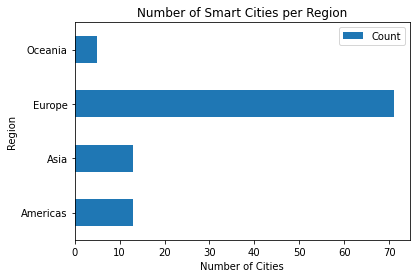

In [50]:
# Plot a bar chart using matplotlib scripting layer
df_by_region.plot(kind='barh')
plt.title('Number of Smart Cities per Region')
plt.xlabel('Number of Cities')
plt.ylabel('Region')
plt.show()